2.1

1

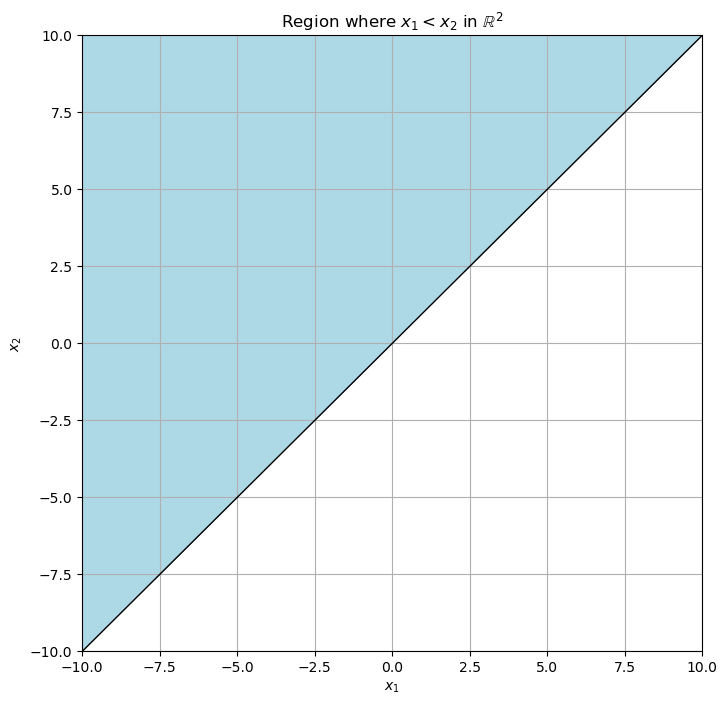

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of x1 and x2 values
x1 = np.linspace(-10, 10, 400)
x2 = np.linspace(-10, 10, 400)
X1, X2 = np.meshgrid(x1, x2)

# Define the function Z = x2 - x1
Z = X2 - X1

# Plot the region where x1 < x2, i.e., where Z > 0
plt.figure(figsize=(8, 8))
plt.contourf(X1, X2, Z, levels=[0, Z.max()], colors=['lightblue']) #This is interesting. Don't completely understand it.
plt.plot(x1, x1, 'k-', linewidth=1)  # Line x2 = x1
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Region where $x_1 < x_2$ in $\\mathbb{R}^2$')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(True)
plt.show()



2

This one is kind of silly. There are so many rationals. I think they are countable though.

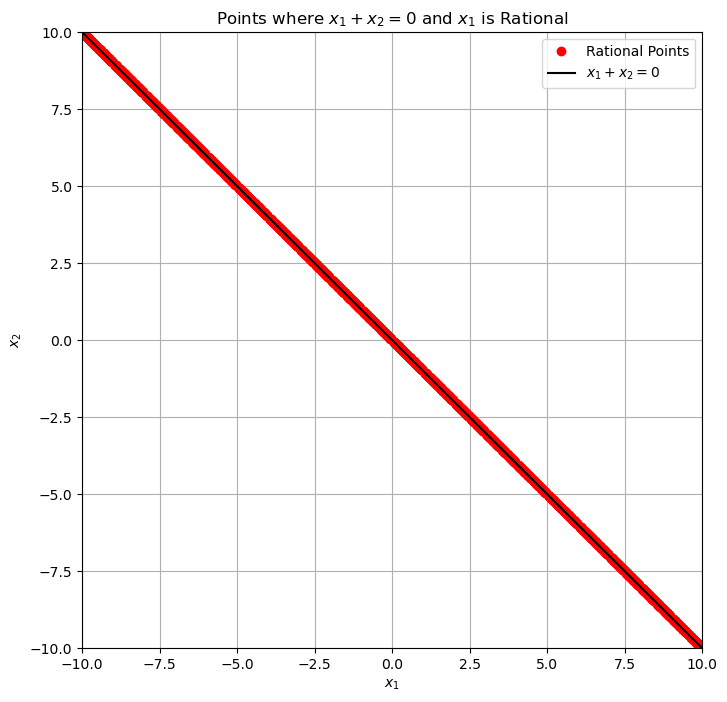

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

# Function to generate rational numbers within a specified range and maximum denominator
def generate_rational_numbers(min_value, max_value, max_denominator):
    rationals = set()
    for denominator in range(1, max_denominator + 1):
        for numerator in range(int(np.floor(min_value * denominator)), int(np.ceil(max_value * denominator)) + 1):
            frac = Fraction(numerator, denominator)
            if min_value <= frac <= max_value:
                rationals.add(frac)
    return sorted(rationals)

# Define the range and maximum denominator for rational numbers
min_value = -10
max_value = 10
max_denominator = 20  # Adjust this value to include more or fewer rational points

# Generate rational x1 values
x1_rational = generate_rational_numbers(min_value, max_value, max_denominator)

# Corresponding x2 values satisfying x1 + x2 = 0
x2_rational = [-float(x1) for x1 in x1_rational]

# Convert fractions to floats for plotting
x1_plot = [float(x1) for x1 in x1_rational]

# Plotting the points and the line x1 + x2 = 0
plt.figure(figsize=(8, 8))
plt.plot(x1_plot, x2_rational, 'ro', label='Rational Points')
plt.plot(np.linspace(min_value, max_value, 400), -np.linspace(min_value, max_value, 400), 'k-', label='$x_1 + x_2 = 0$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Points where $x_1 + x_2 = 0$ and $x_1$ is Rational')
plt.xlim(min_value, max_value)
plt.ylim(min_value, max_value)
plt.legend()
plt.grid(True)
plt.show()


Hmm, what would be interesting is a function that can determine whether a given set satisfies the conditions for a vector space. Is this compuationally possible?

3

In [13]:
# Enable interactive mode in Jupyter Notebook

import numpy as np
import matplotlib.pyplot as plt

# Define the dimension n
n = 5  # You can change this value to any positive integer

# Number of points to generate
num_points = 1000

# Generate random points on the unit sphere in R^n
vectors = np.random.randn(num_points, n)
vectors /= np.linalg.norm(vectors, axis=1)[:, np.newaxis]

# Extract the first three components
x1 = vectors[:, 0]
x2 = vectors[:, 1]
x3 = vectors[:, 2]

# Plot the points in 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x1, x2, x3, c='blue', marker='o', s=5, alpha=0.5)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.set_title(f'Interactive 3D Plot of Unit Sphere in mathbb{{R}}^{n}$ (n={n})')

# Set the aspect ratio to be equal
max_range = np.array([x1.max()-x1.min(), x2.max()-x2.min(), x3.max()-x3.min()]).max() / 2.0

mean_x1 = x1.mean()
mean_x2 = x2.mean()
mean_x3 = x3.mean()

ax.set_xlim(mean_x1 - max_range, mean_x1 + max_range)
ax.set_ylim(mean_x2 - max_range, mean_x2 + max_range)
ax.set_zlim(mean_x3 - max_range, mean_x3 + max_range)

plt.show()



<IPython.core.display.Javascript object>

Fuck it. But its supposed to be a sphere projected down into 3 dimensionns.

In [ ]:
import numpy as np
import plotly.graph_objects as go
from ipywidgets import interactive, IntSlider

def generate_unit_vectors(n_dim, n_vectors):
    vectors = np.random.normal(0, 1, (n_vectors, n_dim))
    vectors /= np.linalg.norm(vectors, axis=1)[:, np.newaxis]
    return vectors

def project_to_3d(vectors):
    return vectors[:, :3]

def plot_3d_vectors(n_dim, n_vectors):
    vectors = generate_unit_vectors(n_dim, n_vectors)
    projected = project_to_3d(vectors)
    
    if n_dim >= 4:
        colors = vectors[:, 3]  # Use 4th dimension for color
    else:
        colors = np.zeros(n_vectors)
    
    fig = go.Figure(data=[go.Scatter3d(
        x=projected[:, 0],
        y=projected[:, 1],
        z=projected[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=colors,
            colorscale='Viridis',
            colorbar=dict(title="4th Dimension"),
            opacity=0.8
        )
    )])
    
    fig.update_layout(
        title=f"{n_dim}-dimensional vectors projected to 3D",
        scene=dict(
            xaxis_title="X",
            yaxis_title="Y",
            zaxis_title="Z"
        ),
        width=800,
        height=800
    )
    
    fig.show()

# Create interactive widget
interactive_plot = interactive(plot_3d_vectors, 
                               n_dim=IntSlider(min=3, max=10, step=1, value=4),
                               n_vectors=IntSlider(min=100, max=5000, step=100, value=1000))

# Display the interactive plot
interactive_plot

In [6]:
import sys
print(sys.executable)


c:\ONEAPE\Math\mathenv\python.exe


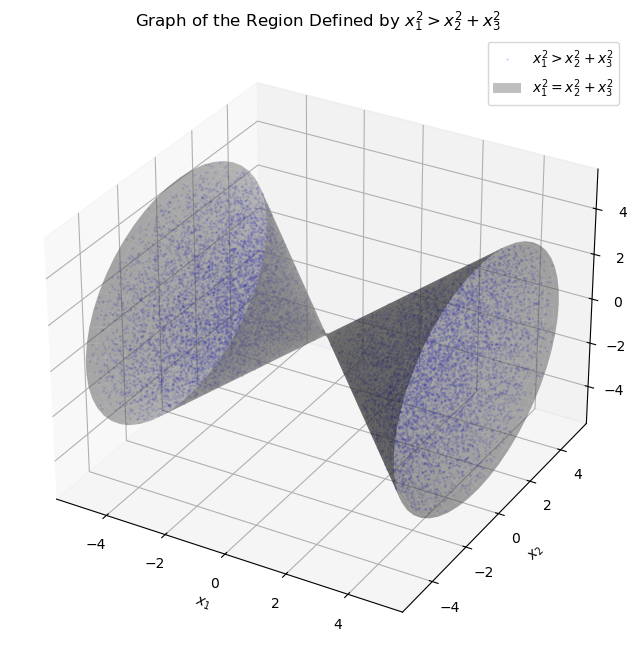

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of random points to generate
N = 50000

# Define the ranges for x1, x2, and x3
x1_range = (-5, 5)
x2_range = (-5, 5)
x3_range = (-5, 5)

# Generate random points within the specified ranges
x1 = np.random.uniform(x1_range[0], x1_range[1], N)
x2 = np.random.uniform(x2_range[0], x2_range[1], N)
x3 = np.random.uniform(x3_range[0], x3_range[1], N)

# Create a mask for points satisfying the inequality x1^2 > x2^2 + x3^2
mask = x1**2 > x2**2 + x3**2

# Filter the points using the mask
x1_in = x1[mask]
x2_in = x2[mask]
x3_in = x3[mask]

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points satisfying the inequality
ax.scatter(x1_in, x2_in, x3_in, alpha=0.1, s=1, color='blue', label=r'$x_1^2 > x_2^2 + x_3^2$')

# Generate data for the cone surface x1^2 = x2^2 + x3^2
x1_surf = np.linspace(-5, 5, 100)
theta = np.linspace(0, 2 * np.pi, 50)
X1_surf, Theta = np.meshgrid(x1_surf, theta)
R = np.abs(X1_surf)
X2_surf = R * np.cos(Theta)
X3_surf = R * np.sin(Theta)

# Plot the cone surface
ax.plot_surface(X1_surf, X2_surf, X3_surf, alpha=0.5, color='grey', label=r'$x_1^2 = x_2^2 + x_3^2$')

# Set labels and title
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.set_title('Graph of the Region Defined by $x_1^2 > x_2^2 + x_3^2$')

# Show legend
ax.legend()

# Display the plot
plt.show()


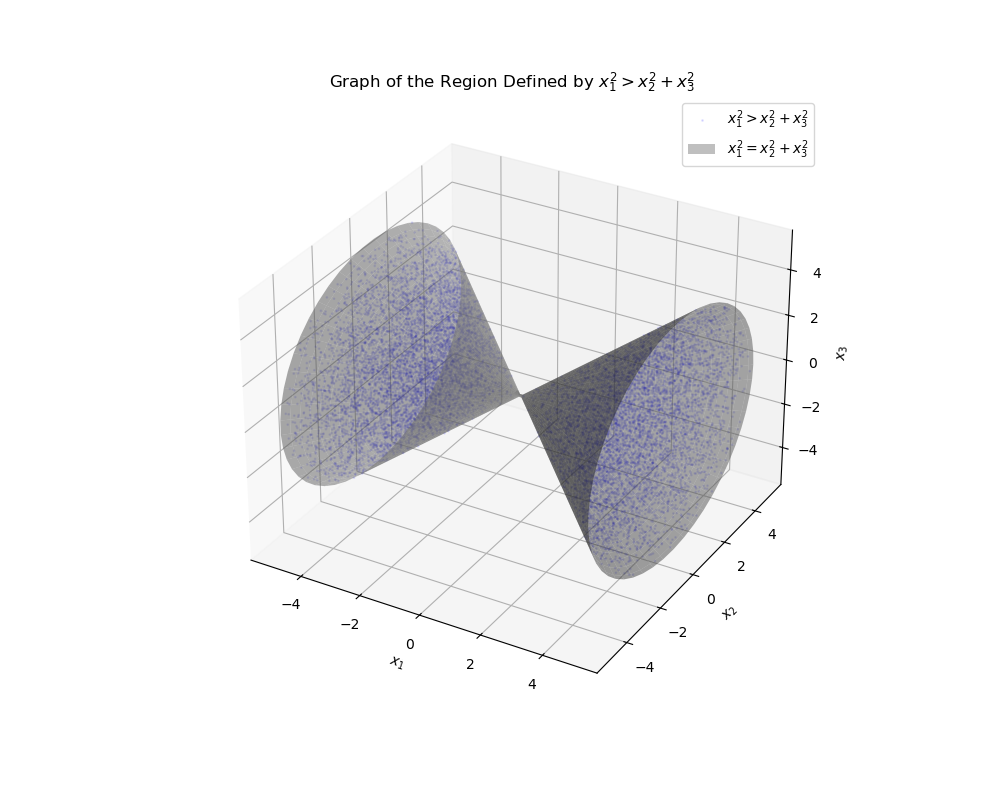

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Enable interactive plotting
%matplotlib widget

# Number of random points to generate
N = 50000

# Define the ranges for x1, x2, and x3
x1_range = (-5, 5)
x2_range = (-5, 5)
x3_range = (-5, 5)

# Generate random points within the specified ranges
x1 = np.random.uniform(x1_range[0], x1_range[1], N)
x2 = np.random.uniform(x2_range[0], x2_range[1], N)
x3 = np.random.uniform(x3_range[0], x3_range[1], N)

# Create a mask for points satisfying the inequality x1^2 > x2^2 + x3^2
mask = x1**2 > x2**2 + x3**2

# Filter the points using the mask
x1_in = x1[mask]
x2_in = x2[mask]
x3_in = x3[mask]

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points satisfying the inequality
ax.scatter(x1_in, x2_in, x3_in, alpha=0.1, s=1, color='blue', label=r'$x_1^2 > x_2^2 + x_3^2$')

# Generate data for the cone surface x1^2 = x2^2 + x3^2
x1_surf = np.linspace(-5, 5, 100)
theta = np.linspace(0, 2 * np.pi, 50)
X1_surf, Theta = np.meshgrid(x1_surf, theta)
R = np.abs(X1_surf)
X2_surf = R * np.cos(Theta)
X3_surf = R * np.sin(Theta)

# Plot the cone surface
ax.plot_surface(X1_surf, X2_surf, X3_surf, alpha=0.5, color='grey', label=r'$x_1^2 = x_2^2 + x_3^2$')

# Set labels and title
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.set_title('Graph of the Region Defined by $x_1^2 > x_2^2 + x_3^2$')

# Show legend
ax.legend()

# Display the plot
plt.show()
